In [3]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from ipywidgets import interact
import ipywidgets as widgets
import traitlets
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML
import os
import subprocess
import time
from cStringIO import StringIO
import pandas as pd
from scipy.io import savemat, loadmat

Populating the interactive namespace from numpy and matplotlib


The Hamiltonian is
$$ \mathcal{H}(x, p) = (e^p - 1)\beta x + (e^{-p}-1)(\delta_1 x^2 + \delta_2 x) $$
The level curves $\mathcal{H}(x, p) = const$ are trajectories of the dynamical system
\begin{align}
\dot{x} &= \frac{\partial \mathcal{H}}{\partial p} \\
\dot{p} &= -\frac{\partial \mathcal{H}}{\partial x}
\end{align}
In particular, we have
\begin{align}
\dot{x} &= r(p)x\left(1 - \frac{x}{K(p)}\right) \\
\dot{p} &= -\beta(e^p - 1) - (2\delta_1 x + \delta_2)(e^{-p} - 1)
\end{align}
where
$$r(p) = \beta e^p - \delta_2 e^{-p},
\quad K(p) = \frac{r(p)e^p}{\delta_1}$$

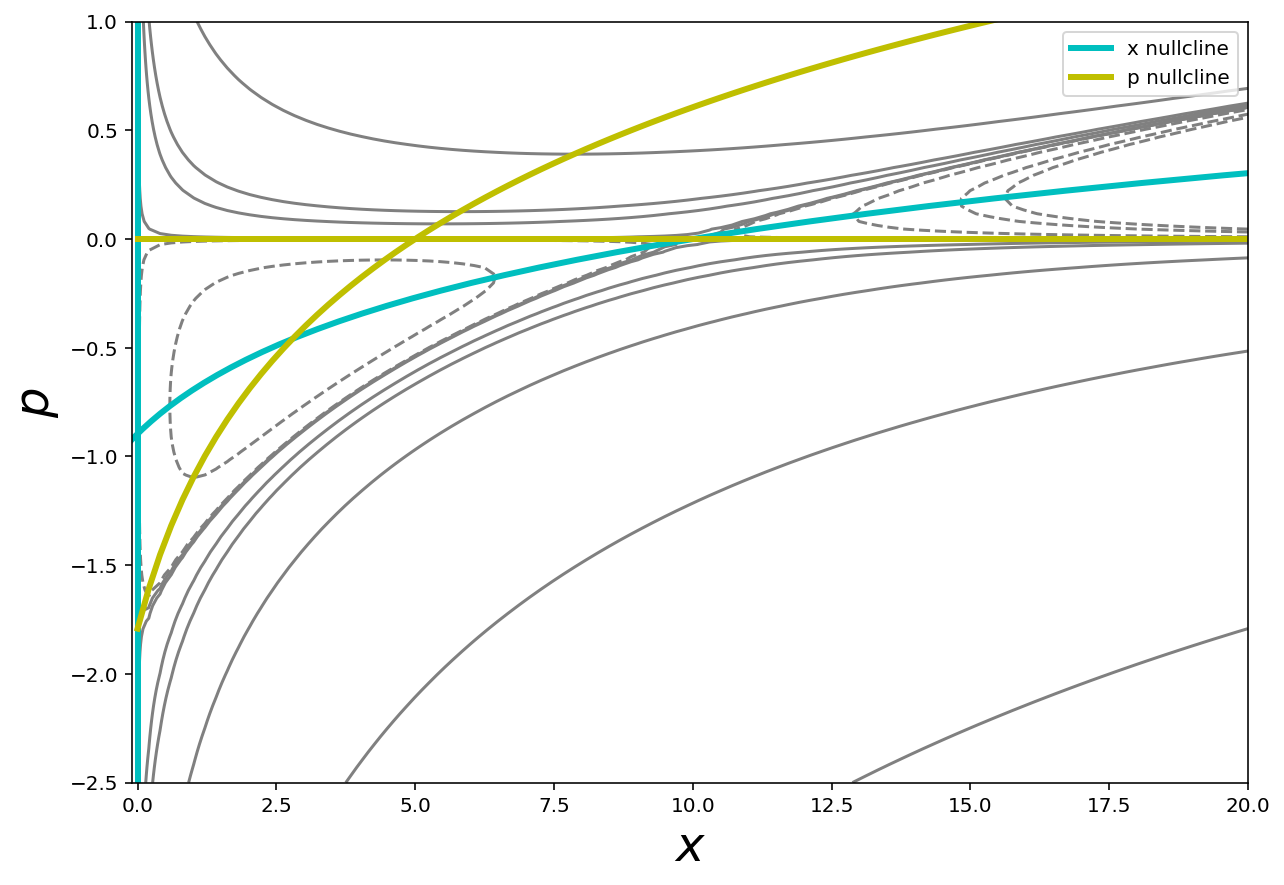

In [7]:
beta = 6.
delta1 = 0.5
delta2 = 1.
delta3 = 0
K = (beta - delta2)/delta1

p = linspace(-2.5, 1, 100)
x = linspace(0, 2*K, 100)
dhat = delta1*x**2 + delta2*x
bhat = beta*x
rofp = beta*exp(p) - delta2*exp(-p)
Kofp = rofp*exp(p)/delta1
eta = 2.*delta1*x + delta2

## solution to H(x, p) = 0
pofx = log((delta1*x + delta2)/beta)
## solutions to H(x, p) = C
C = -1
discr = (bhat + dhat + C)**2 - 4.*bhat*dhat
q1 = (bhat + dhat + C + sqrt(discr))/(2*bhat)
q2 = (bhat + dhat + C - sqrt(discr))/(2*bhat)
p1 = log(q1)
p2 = log(q2)

## Hamiltonian surface (for contours)
X, P = meshgrid(x, p)
DHAT = delta1*X**2 + delta2*X + delta3
BHAT = beta*X
H = BHAT*(exp(P) - 1.) + DHAT*(exp(-P) - 1.)

## plotting commands
figure(1, [10, 7])

## nullclines
plot(x*0., p, 'c', lw=3, label='x nullcline')
plot(Kofp, p, 'c', lw=3)
plot(x, p*0., 'y', lw=3, label='p nullcline')
plot(x, log(eta/beta), 'y', lw=3)

## Trajectories from H = C
# plot(x, pofx, '--k')
# plot(x, log(q1), 'k')
# plot(x, log(q2), 'g')
conts = [-4.2, -3., -1., -0.05, 0., 0.05, 1., 2., 10., 100., 1000.]
contour(X, P, H, conts, colors='0.5')

xlim(-0.1, 2*K)
ylim(-2.5, 1);
xlabel('$x$', fontsize=24)
ylabel('$p$', fontsize=24);
legend();


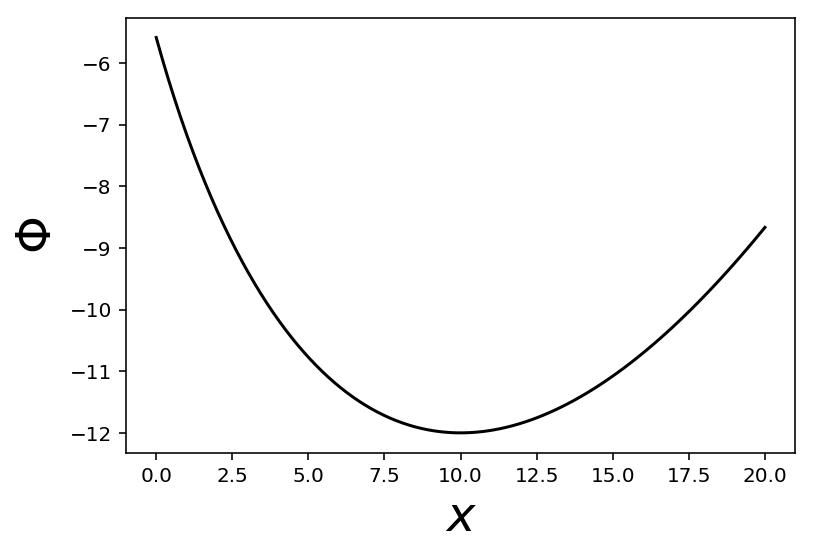

In [9]:
sub2 = (delta1*x + delta2)/beta
Phi = beta/delta1*sub2*(log(sub2) - 1)
plot(x, Phi, 'k')
xlabel('$x$', fontsize=24)
ylabel('$\Phi$', fontsize=24);

In [6]:
?contour